In [4]:
import pandas as pd
import numpy as np


In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.5 MB/s eta 0:00:0000:0100:01


In [20]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 4.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
# 다양한 인코딩 중 하나를 사용하여 데이터 불러오기
encodings = ['utf-8', 'cp949', 'latin1', 'iso-8859-1']

for encoding in encodings:
    try:
        # 데이터 불러오기 시도
        print(f"Trying encoding: {encoding}")
        try:
            df = pd.read_csv('AirPassengers_converted.csv', parse_dates=['month'], index_col='month', encoding=encoding)
        except ValueError as ve:
            print(f"ValueError: {ve}")
            print("Loading the file without parsing dates.")
            df = pd.read_csv('AirPassengers_converted.csv', encoding=encoding)
        print("Data loaded successfully with encoding:", encoding)
        print(df.head())  # 데이터 미리보기
        break  # 성공 시 루프 탈출
    except UnicodeDecodeError as e:
        print(f"Failed with encoding {encoding}: {e}")

Trying encoding: utf-8
Data loaded successfully with encoding: utf-8
       passengers  year
month                  
1             112  1949
2             118  1949
3             132  1949
4             129  1949
5             121  1949


/tmp/ipykernel_21138/3034706381.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('AirPassengers_converted.csv', parse_dates=['month'], index_col='month', encoding=encoding)


# 결측값 찾기

In [14]:
# 결측값 확인
missing_data = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_data)

# 결측값이 있을 경우 처리
if missing_data.any():
    # 결측값을 평균으로 대체
    df.fillna(df.mean(), inplace=True)
    print("\nMissing values have been replaced with column means.")



Missing values in each column:
passengers    0
year          0
dtype: int64


# visualiation

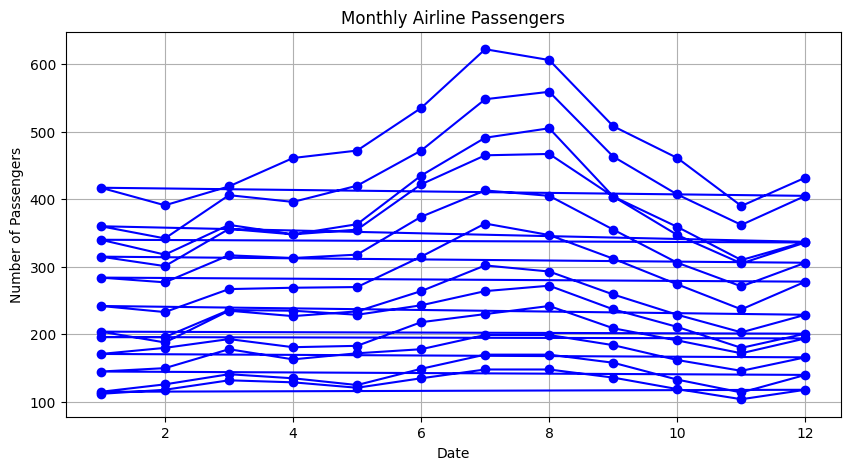

In [17]:
import matplotlib.pyplot as plt

# 월별 승객 수 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['passengers'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# 시계열 분석

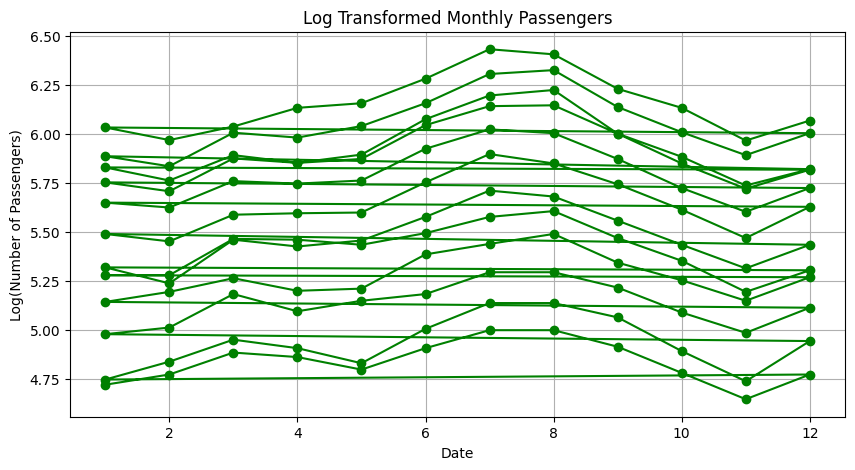


ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


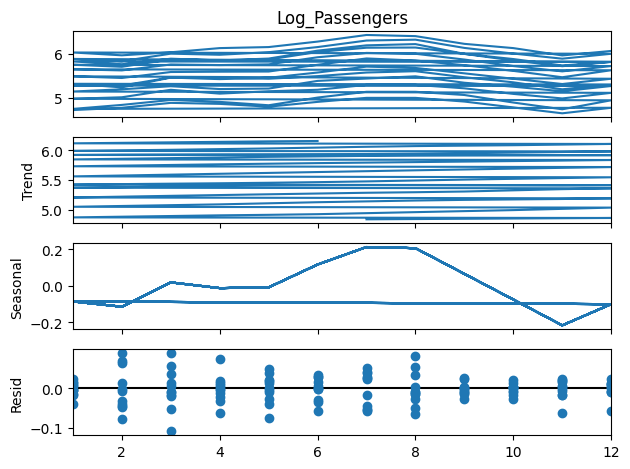

In [21]:
# 로그 변환
df['Log_Passengers'] = np.log(df['passengers'])

# 로그 변환 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Log_Passengers'], marker='o', color='green')
plt.title('Log Transformed Monthly Passengers')
plt.xlabel('Date')
plt.ylabel('Log(Number of Passengers)')
plt.grid(True)
plt.show()

from statsmodels.tsa.stattools import adfuller

# ADF 검정
adf_result = adfuller(df['Log_Passengers'])
print("\nADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
decomposition = seasonal_decompose(df['Log_Passengers'], model='additive', period=12)

# 시각화
decomposition.plot()
plt.show()


# arima

/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is av


Forecast for next 12 months:
144    6.138144
145    6.097894
146    6.121131
147    6.107716
148    6.115461
149    6.110990
150    6.113571
151    6.112081
152    6.112941
153    6.112444
154    6.112731
155    6.112566
156    6.112661
Name: predicted_mean, dtype: float64


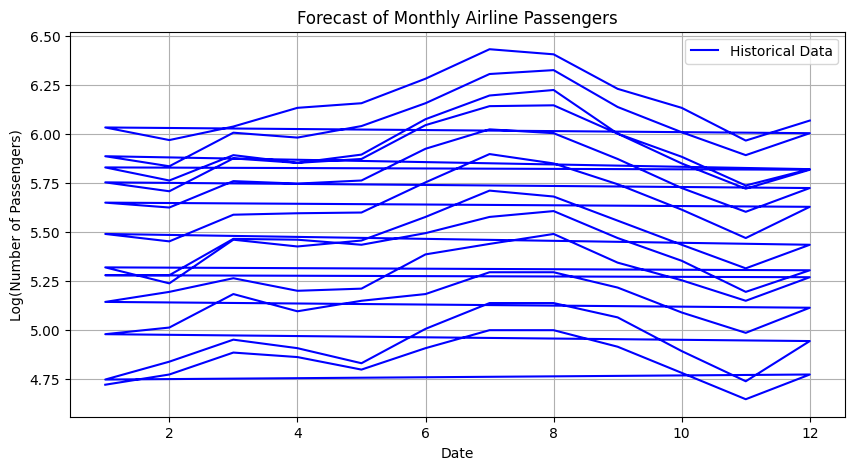


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:         Log_Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 124.313
Date:                Mon, 07 Apr 2025   AIC                           -242.626
Time:                        00:15:26   BIC                           -233.738
Sample:                             0   HQIC                          -239.014
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5773      0.164     -3.516      0.000      -0.899      -0.256
ma.L1          0.8478      0.098      8.687      0.000       0.657       1.039
sigma2         0.0103      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 학습
model = ARIMA(df['Log_Passengers'], order=(1, 1, 1))
model_fit = model.fit()

# 예측
forecast = model_fit.predict(start=len(df), end=len(df) + 12)
print("\nForecast for next 12 months:")
print(forecast)

# 예측 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Log_Passengers'], label='Historical Data', color='blue')
plt.title('Forecast of Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Log(Number of Passengers)')
plt.legend()
plt.grid(True)
plt.show()

print("\nARIMA Model Summary:")
print(model_fit.summary())  # ARIMA 모델 요약
